In [3]:
!pip install scapy
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444325 sha256=41b298a26a579c3c1796240a111c2bdd723f44a11f72543cf82642e50f4151a6
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
def draw_graph(G, edge_latencies):
    pos = nx.spring_layout(G)

    # Draw nodes 
    degree = G.degree()
    colors = [degree[node] for node in G.nodes()]
    nx.draw(G, pos, node_color=colors, with_labels=True)

    # Draw edges based on latency
    edge_widths = [edge_latencies[edge] for edge in G.edges()]
    nx.draw_networkx_edges(G, pos, width=edge_widths)

    plt.show()
    plt.tight_layout()



1. 172.28.0.1 (172.28.0.1)
2. 108.170.230.226 (108.170.230.226)
3. 206.72.210.232 (edgecast-networks.as15133.any2ix.coresite.com)
4. 152.195.77.133 (ae-86.core1.oxr.edgecastcdn.net)
5. 93.184.216.34 (93.184.216.34)
6. 93.184.216.34 (93.184.216.34)
7. 93.184.216.34 (93.184.216.34)
8. 93.184.216.34 (93.184.216.34)
9. 93.184.216.34 (93.184.216.34)
10. 93.184.216.34 (93.184.216.34)
11. 93.184.216.34 (93.184.216.34)
12. 93.184.216.34 (93.184.216.34)
13. 93.184.216.34 (93.184.216.34)
14. 93.184.216.34 (93.184.216.34)
15. 93.184.216.34 (93.184.216.34)
16. 93.184.216.34 (93.184.216.34)
17. 93.184.216.34 (93.184.216.34)
18. 93.184.216.34 (93.184.216.34)
19. 93.184.216.34 (93.184.216.34)
20. 93.184.216.34 (93.184.216.34)
21. 93.184.216.34 (93.184.216.34)
22. 93.184.216.34 (93.184.216.34)
23. 93.184.216.34 (93.184.216.34)
24. 93.184.216.34 (93.184.216.34)
25. 93.184.216.34 (93.184.216.34)
26. 93.184.216.34 (93.184.216.34)
27. 93.184.216.34 (93.184.216.34)
28. 93.184.216.34 (93.184.216.34)
29. 93.

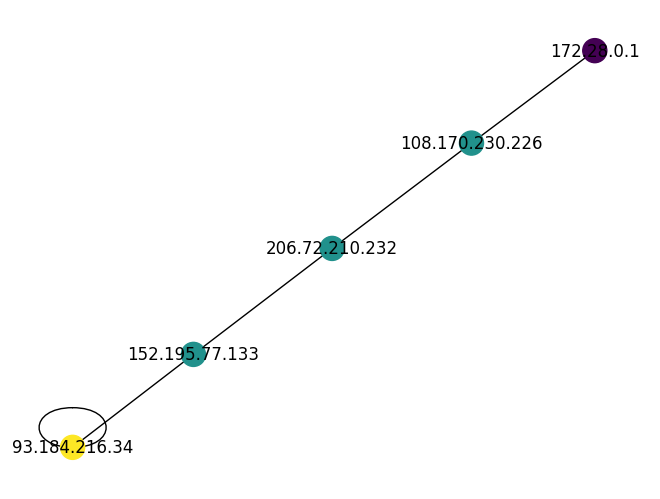

<Figure size 640x480 with 0 Axes>

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from scapy.all import *
def get_domain_name(ip_address):
        try:
            # Reverse DNS lookup 
            domain_name = socket.gethostbyaddr(ip_address)[0]
            return domain_name
        except socket.herror:
            # Unable to resolve the domain name
            return ip_address

def traceroute(destination, max_hops):
    # Set the destination and maximum number of hops
    dport = 33434  # Destination port for traceroute
    ttl = 1

    # Create an empty graph
    G = nx.Graph()

    prev_ip = None
    edge_latencies = {}  # Latency
    while True:
        # ICMP echo request packet with the specified TTL
        packet = IP(dst=destination, ttl=ttl) / ICMP()

        start_time = time.time()
        
        reply = sr1(packet, verbose=False, timeout=1)

        latency = time.time() - start_time

        if reply is None:
            # No response received
            print(f"{ttl}. *")
        elif reply.type == 3:
            # Destination reached
            print(f"{ttl}. {reply.src}({get_domain_name(reply.src)})")
            break
        else:
            # Intermediate hop reached
            print(f"{ttl}. {reply.src} ({get_domain_name(reply.src)})")

            if prev_ip is not None:
                # Add an edge to the graph between the current and previous hop
                G.add_edge(prev_ip, reply.src)
                # Store the latency 
                edge_latencies[(prev_ip, reply.src)] = latency
            prev_ip = reply.src

        # Increment TTL 
        ttl += 1

        if ttl > max_hops:
            # Maximum number of hops reached
            break

    return G, edge_latencies



G, edge_latencies = traceroute("www.example.com", 30)
draw_graph(G, edge_latencies)

